<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, семинар 5 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Ensembles
<h3> Plan </h3>

* **Bagging** 
 - Описание композиции Bagging
 - Bagging в применении в DT
 - Random Forest
 
* **Boosting**
 - Описание Boosting
 - Gradient Boosting, XGBoost
 - RandomForest vs Boosting 

* **Bias-vairance trade-off**
  - Разложение ошибки на Bias и Variance
  - bias\variance для bagging и boosting
  - Выбор базового алгоритма:
    - Корреляция для DT и LR
    - Выбор числа базовых алгоритмов для RF

In [2]:
%matplotlib inline 
from IPython.display import Image
# Проверьте установлин ли у вас grapviz "dot -h" в терминале
# Обновите pydot "sudo pip2 install pydot --upgrade" в терминале

import warnings
warnings.simplefilter("ignore")

----------
<h1 align="center">Bagging</h1> 

** Вопросы **
* Зачем нужно строит композиции над алгоритмами?
* Что такое bootstrap-выборка?
* Что такие RSM, Pasting?
* Какие бывают варианты построения композиций N базовых алгоритмов классификации?
* Что такое Bagging?
* Почему работает Bagging?

### Описание композиции Bagging

## $$a_{Bagging}(x) = \frac{1}{M}\sum_{i=1}^M a_i(x)$$

$a_i(x)$ - обучен на бутстреп-выборке $X^i$

### Bagging в применении в DT

See <a href='https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/05-trees_ensembles/TreesBagging.ipynb'>TreesBagging.ipynb</a>

### Random Forest

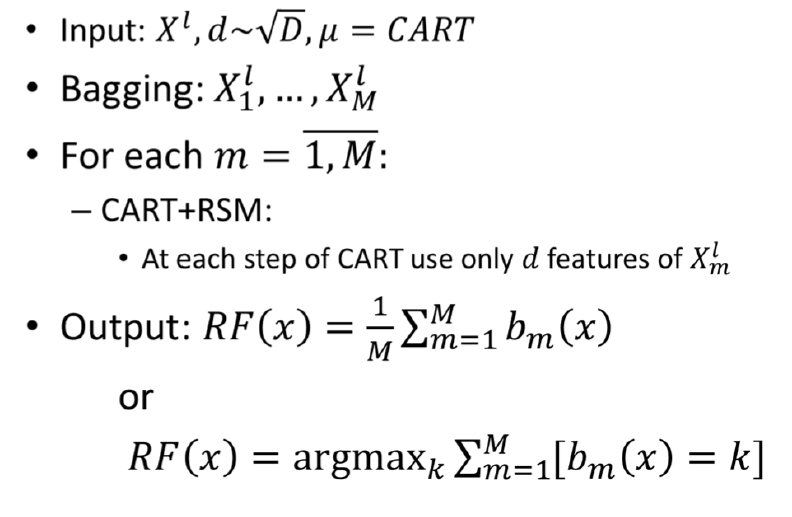

In [10]:
Image('pic/RF.PNG', width=600, height=600)

-----
<h1 align="center">Boosting</h1> 

** Вопросы **
* Какое решающее правило применяется для базовых алгоритмов в Boosting?
* Как подбираются веса базовых алгоритмов?
* Можно ли распараллелить построение композиции boosting?
* В чем основные особенности GradientBoosting? Что такое Stochastic GradientBoosting?
* В чём основные особенности XGBoost?

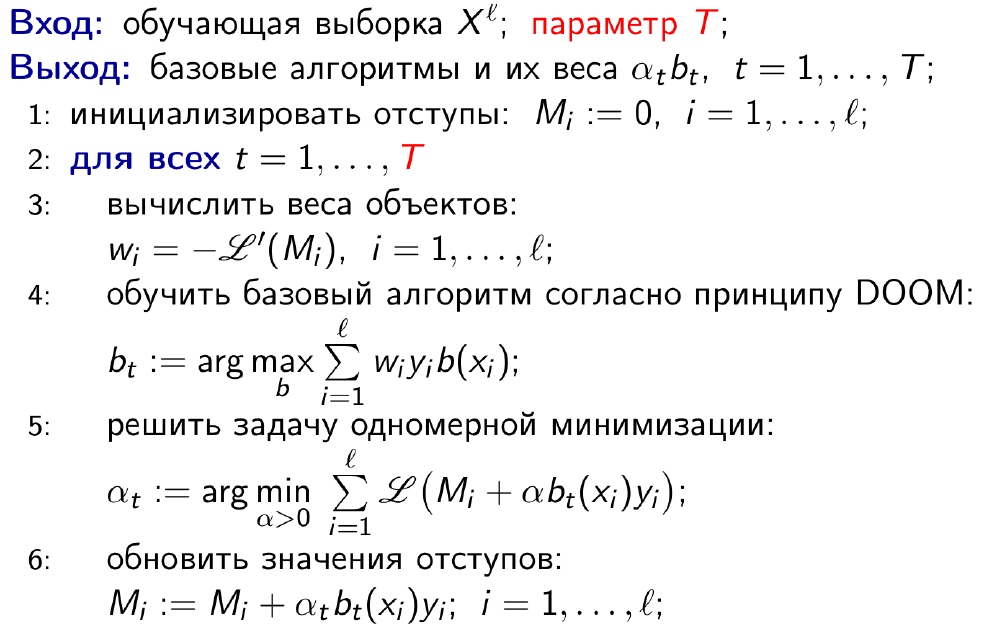

In [9]:
# Boosting
Image('pic/Boosting.png', height=600, width=600)

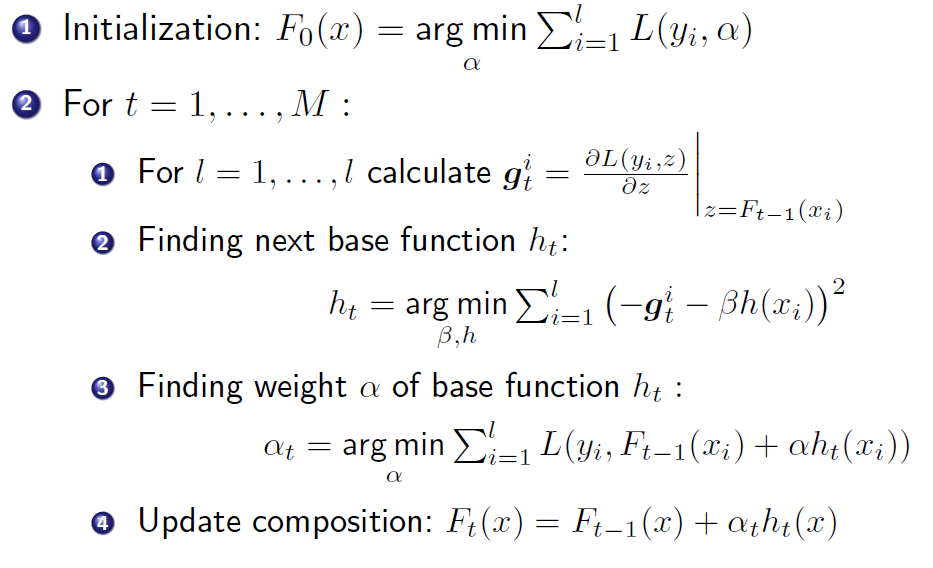

In [11]:
# Gradient Boosting
Image('pic/GBM.png', height=600, width=600)

### XGBoost
1) Базовый алгоритм приближает направление, посчитанное с учетом вторых производных функции потерь.

2) Отклонение направления, построенного базовым алгоритмом, измеряется с помощью модифицированного функционала — из него удалено деление на вторую производную, за счет чего избегаются численные проблемы.

3) Функционал регуляризуется -- добавляются штрафы за количество листьев и за норму коэффициентов.

4) При построении дерева используется критерий информативности, зависящий от оптимального вектора сдвига.

5) Критерий останова при обучении дерева также зависит от оптимального сдвига.

### Сравнение XGBoost и RF 
See <a href="https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/seminars/05-trees_ensembles/rf_vs_gb.ipynb">rf_vs_gb</a>

<h1 align="center">Bias-Variance Tradeoff</h1> 

###  Разложение ошибки на Bias и Variance

#### Какя природа бывает у ошибок

<img src="pic/bv_darts.png", width=400>

#### Как это отражается на модели

<img src="pic/bv_model_complex.png">

Далее  смотреть <a href = ''>seminar03</a>

### Bias\variance для Bagging и Boosting

### Смещение для беггинга

<img src="pic/bag_mu1.png">

<img src="pic/bag_mu2.png">

### Разброс для беггинга

<img src="pic/bag_var1.png">

<img src="pic/bag_var2.png">

<img src="pic/bag_var3.png">
Help: Раздел 3.2 https://github.com/esokolov/ml-course-msu/blob/master/ML15-spring/lecture-notes/Sem04_ensembles.pdf

<span style='color:red; font-size:12pt'> Bagging уменьшает дисперсию! </span> - используйте "strong learner" (НЕбольшое смещение, большой разброс)

<span style='color:red; font-size:12pt'> Boosting уменьшает разброс! </span> - используйте "weak learner" (большое смещение, НЕбольшой разброс) 

### Выбор вызового алгоритма: DT или LR

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
# dataset Титаник
titanic = pd.read_csv('./data/train.csv')[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22,7.2500
1,1,1,female,38,71.2833
2,1,3,female,26,7.9250
3,1,1,female,35,53.1000
4,0,3,male,35,8.0500


In [4]:
sex_encoder = LabelEncoder()
titanic.Sex = sex_encoder.fit_transform(titanic.Sex)
features = ['Pclass', 'Sex', 'Age', 'Fare']
X, y = titanic[features].values, titanic.Survived.values

X = np.nan_to_num(X)

### Обучим линейную модель на разных подвыборках, похожи ли коэфиценты?

In [5]:
from sklearn.linear_model import LogisticRegression

for n_items in [200, 500]:
    reg = LogisticRegression().fit(X[:n_items], y[:n_items])
    print 'n_items', n_items, 'w = ',', '.join(map(lambda x: '%.4f' % x, reg.coef_[0]))

n_items 200 w =  -0.4027, -2.3487, -0.0196, -0.0004
n_items 500 w =  -0.6117, -2.4663, -0.0112, 0.0017


### Обучем деревья на тех же подвыборках, похожи ли деревья?

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree1 = DecisionTreeClassifier().fit(X[:200], y[:200])
tree2 = DecisionTreeClassifier().fit(X[:500], y[:500])

Если не работает pydot, то можно установить pydotplus и заменить все включения. Дополнительно необходимо установить graphviz для отображения дерева.
Подробности установки можно найти на http://graphviz.org/

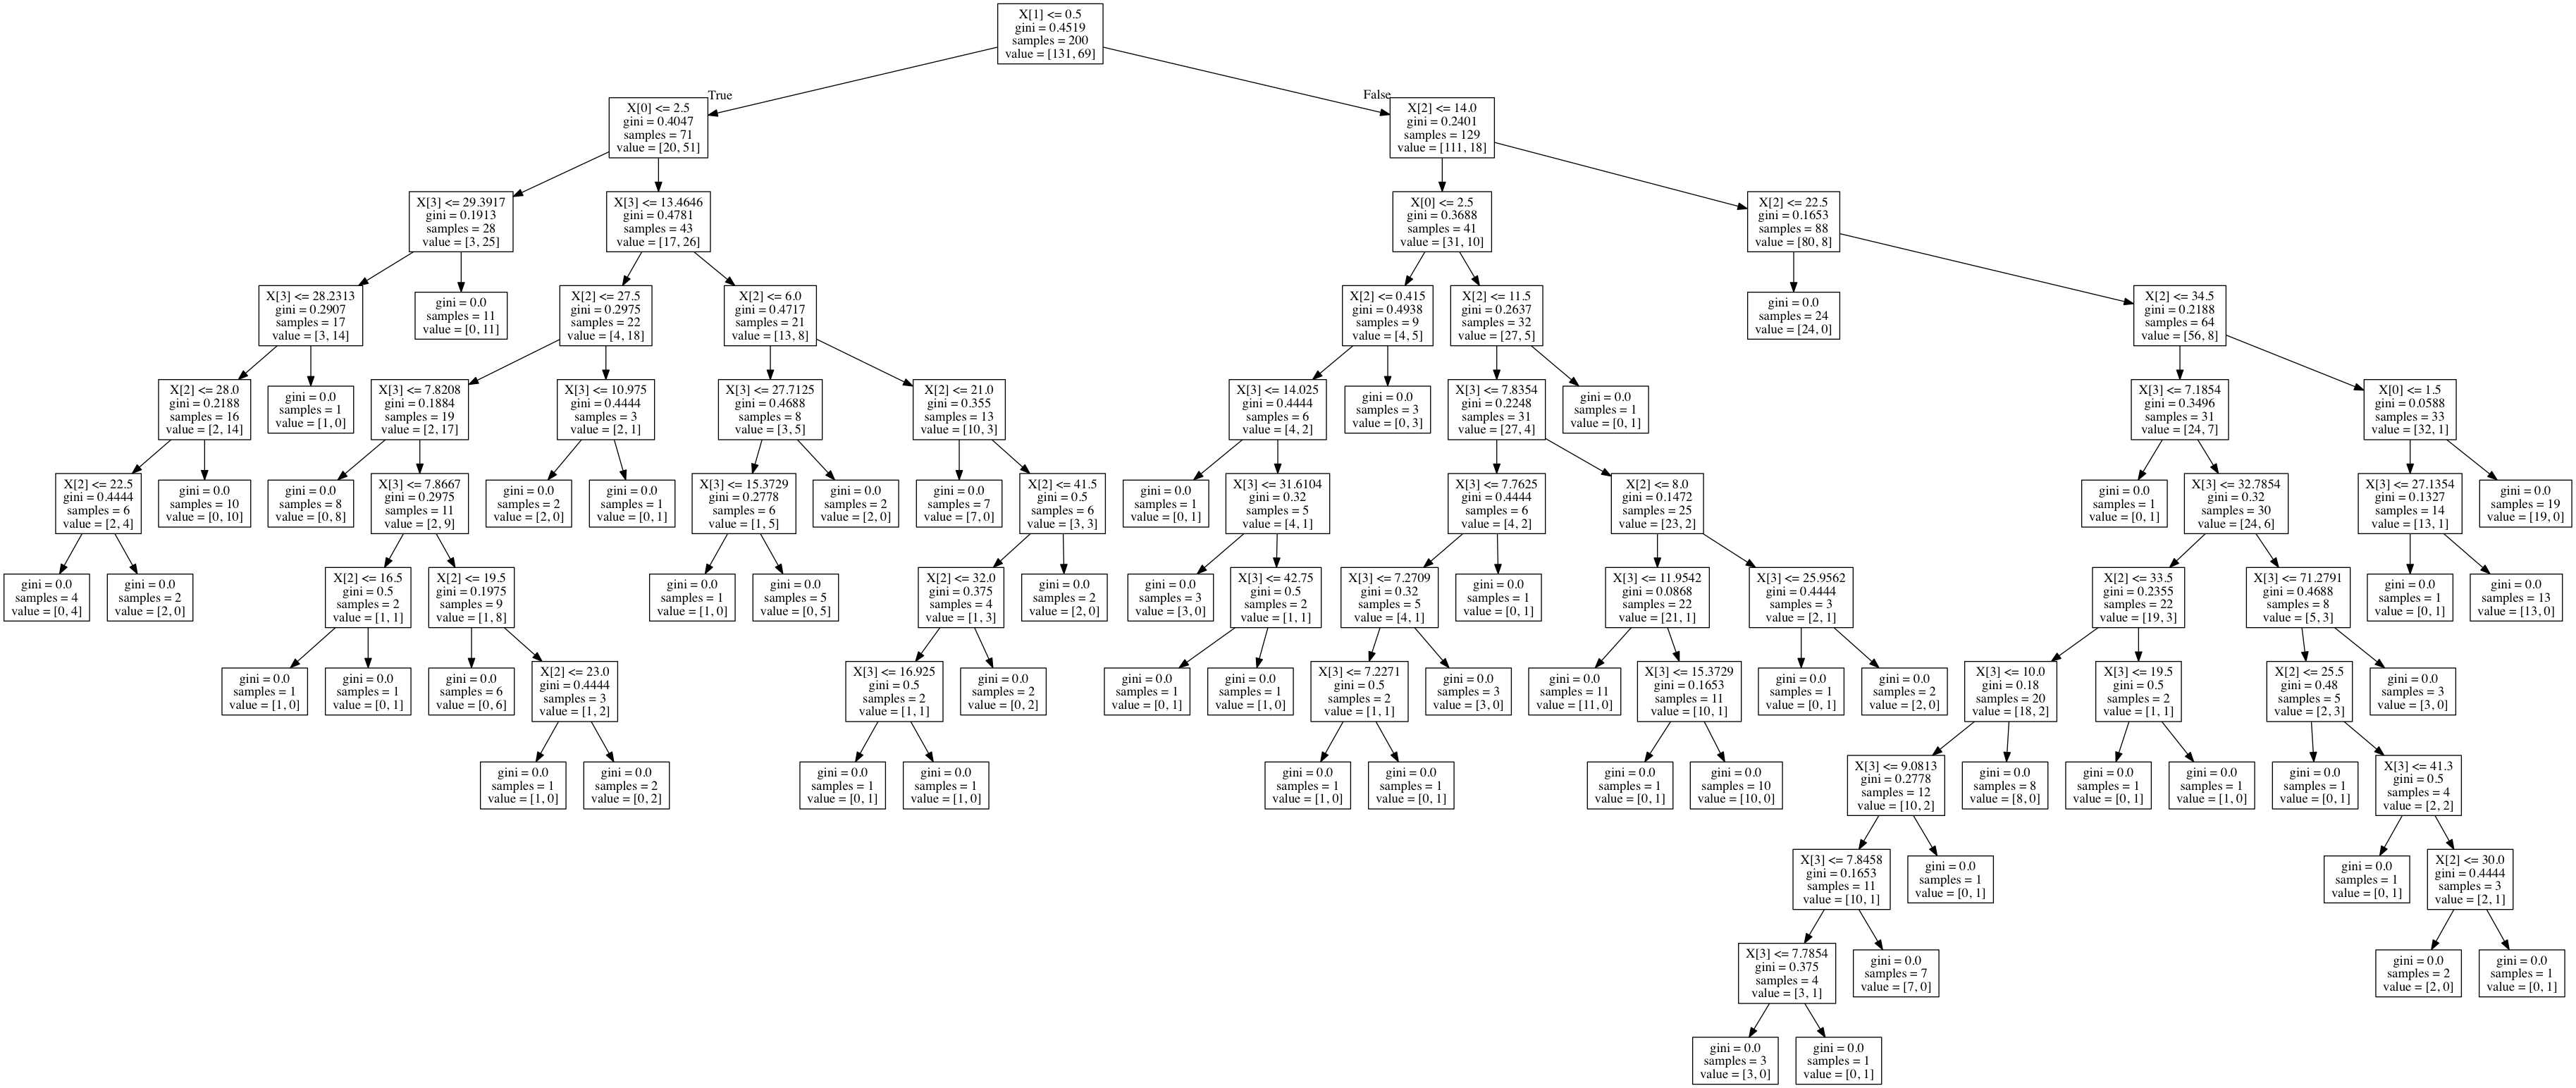

In [7]:
import pydot 
from StringIO import StringIO
from IPython.display import Image  

dot_data = StringIO()  
export_graphviz(tree1, out_file=dot_data)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
Image(graph.create_png())  

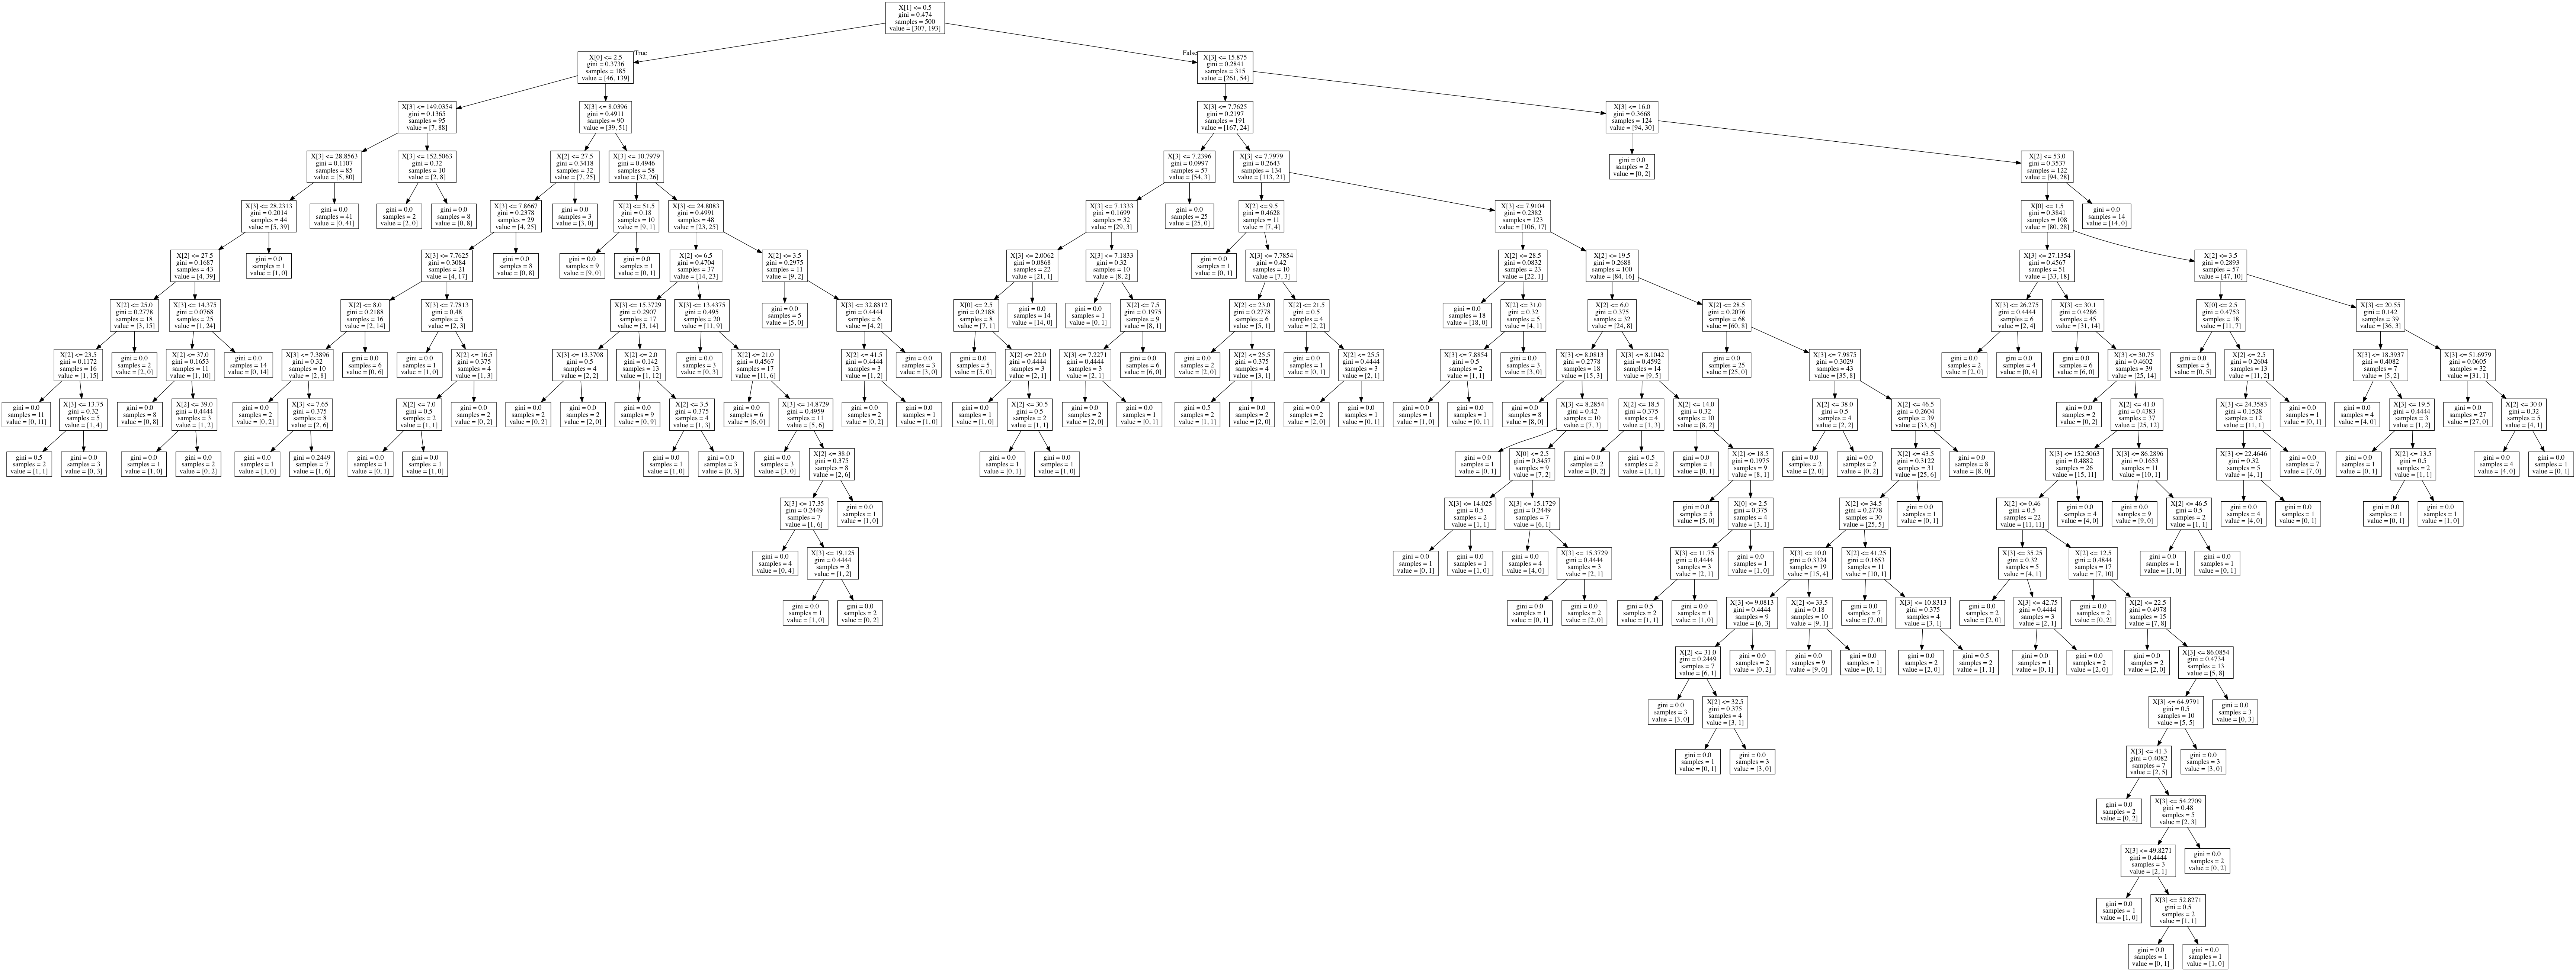

In [8]:
dot_data = StringIO()  
export_graphviz(tree2, out_file=dot_data)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
Image(graph.create_png()) 

### Сравнение DT и линейных моделей

### Read data

In [9]:
adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")

In [10]:
adult.head(2)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [11]:
adult = pd.get_dummies(adult)

In [12]:
adult.head(2)

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ <=50K,Target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [13]:
adult["Target"] = adult["Target_ >50K"]

In [14]:
adult.columns[:-3]

Index([u'Age', u'fnlwgt', u'Education-Num', u'Capital Gain', u'Capital Loss',
       u'Hours per week', u'Workclass_ ?', u'Workclass_ Federal-gov',
       u'Workclass_ Local-gov', u'Workclass_ Never-worked',
       ...
       u'Country_ Portugal', u'Country_ Puerto-Rico', u'Country_ Scotland',
       u'Country_ South', u'Country_ Taiwan', u'Country_ Thailand',
       u'Country_ Trinadad&Tobago', u'Country_ United-States',
       u'Country_ Vietnam', u'Country_ Yugoslavia'],
      dtype='object', length=108)

In [15]:
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values

### Model correlation

In [16]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier

### Беггинг на лог-регрессиях 

In [17]:
from sklearn.linear_model import LogisticRegression

clf1 = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100)
scores1 = cross_val_score(clf1, X, y, cv=4, n_jobs=4)

print scores1

[ 0.79646235  0.79434889  0.79889435  0.80036855]


### Беггинг на девевьях

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
scores2 = cross_val_score(clf2, X, y, cv=4, n_jobs=4)

print scores2

[ 0.8502641   0.8544226   0.85540541  0.85700246]


### Натренируем модели и получим базовые алгоритмы

In [19]:
X_train, y_train, X_test, y_test = X[:20000], y[:20000], X[20000:], y[20000:]

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)

In [20]:
X_test.shape

(12561, 108)

In [21]:
clf1.estimators_[0].predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

### Посмотрим на корреляцию предсказаний

In [22]:
pred1 = [clf.predict(X_test) for clf in clf1.estimators_]
pred2 = [clf.predict(X_test) for clf in clf2.estimators_]

In [23]:
from scipy.stats import pearsonr

In [24]:
pearsonr(pred1[0], pred1[1])[0]

0.94975067828688087

In [25]:
pearsonr(pred2[0], pred2[1])[0]

0.53024756649581006

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [27]:
A = np.zeros((len(clf1.estimators_), len(clf1.estimators_)))

for i in range(len(clf1.estimators_)):
    for j in range(len(clf1.estimators_)):
        A[i, j] = pearsonr(pred1[i], pred1[j])[0]

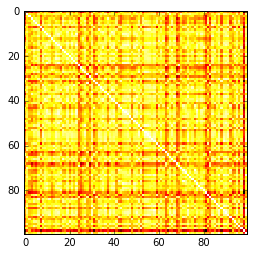

In [28]:
pylab.imshow(A, interpolation='none', cmap='hot')

In [29]:
A = np.zeros((len(clf1.estimators_), len(clf1.estimators_)))

for i in range(len(clf1.estimators_)):
    for j in range(len(clf1.estimators_)):
        A[i, j] = pearsonr(pred2[i], pred2[j])[0]

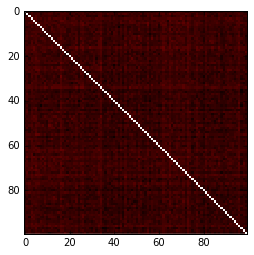

In [30]:
pylab.imshow(A, interpolation='none', cmap='hot')

###  Есть ли overfitting с увеличением числа деревьев и сложности?

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print 'n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc)

n_estimators =   10 train_acc = 0.98775 test_acc = 0.846907093384
n_estimators =   40 train_acc = 0.99945 test_acc = 0.85319640156
n_estimators =  100 train_acc = 0.99995 test_acc = 0.858769206273
n_estimators =  200 train_acc =  1.0 test_acc = 0.856540084388
n_estimators =  600 train_acc =  1.0 test_acc = 0.857654645331
n_estimators = 1000 train_acc =  1.0 test_acc = 0.859008040761
CPU times: user 9.32 s, sys: 5.55 s, total: 14.9 s
Wall time: 4min 46s


In [33]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print 'n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc)

n_estimators =   10 train_acc = 0.8606 test_acc = 0.857575033835
n_estimators =   40 train_acc = 0.86255 test_acc = 0.857495422339
n_estimators =  100 train_acc = 0.86205 test_acc = 0.857256587851
n_estimators =  200 train_acc = 0.8616 test_acc = 0.856778918876
n_estimators =  600 train_acc = 0.86155 test_acc = 0.85669930738
n_estimators = 1000 train_acc = 0.86165 test_acc = 0.85669930738
CPU times: user 6.24 s, sys: 1.49 s, total: 7.73 s
Wall time: 2min 34s


In [34]:
%%time

for n_estimators in [10, 40, 100, 200, 600, 1000]:
    clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=14), n_estimators=n_estimators, n_jobs=4)
    clf = clf.fit(X_train, y_train)
    train_acc, test_acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
    print 'n_estimators = %4s train_acc = %4s test_acc = %4s' %(n_estimators, train_acc, test_acc)

n_estimators =   10 train_acc = 0.90925 test_acc = 0.859087652257
n_estimators =   40 train_acc = 0.91255 test_acc = 0.86155560863
n_estimators =  100 train_acc = 0.9128 test_acc = 0.862192500597
n_estimators =  200 train_acc = 0.9142 test_acc = 0.862033277605
n_estimators =  600 train_acc = 0.913 test_acc = 0.862351723589
n_estimators = 1000 train_acc = 0.91305 test_acc = 0.862829392564
CPU times: user 6.97 s, sys: 2.46 s, total: 9.43 s
Wall time: 3min 29s


<h1 align="center">Заключение</h1> 

**Смещение и разброс**:
    - Ошибки бывают разные
    - Ошибку можно разложить на составляющие части, чтобы лучше понимать, что происходит
    - Это может помочь нам придумать хорошие алгоритмы и понимать, как такие алгоритмы будут работать

**Bagging**:
    - Одна из лучших техник для построения алгоритмов ML
    - Линейно уменьшает Разброс и не уменьшает Смещение (если не коррелированы ответы базовых алоритмов) 
    - Слабое переобучение
    - НО переобучение ЕСТЬ -- от сложности одного алгоритма, лучше все же немного обрезать деревья
** Boosting **
   - Один из лучших методов построения композиций
   - Нужно много деревьев и желательно не тысячи признаков
   - Много хороших реализаций
    - Плохо подходит для картинок и прочих очень понятных данных

**Дополнительная литература**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU
    - 2.9 Model Selection and the Bias–Variance Tradeoff 
    - 15 Random Forests
    - 10 Boosting and Additive Trees 337
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJб http://goo.gl/ajNTQy
- Andrew Ng, Bias vs. Variance, https://goo.gl/1ISZ6Y 

** Домашнее задание ** 
* Будет выложено сюда <a href = "https://github.com/ml-mipt/ml-mipt-part1/blob/master/2017/home_work"> HW#3 <a>
   - <span style='color:blue; font-size:10pt'> Рассказ о нём на лекции, рассчитано на 2 недели </span>

** Обратная связь ** 
  * оцените <a href="https://docs.google.com/forms/d/e/1FAIpQLSdmyY3f-lwrhSGeqJPaxcXrdj0SfZzZbgRIggg-nx4EQ_eQLQ/viewform?c=0&w=1"> семинар </a>
  * оставьте <a href="https://docs.google.com/forms/d/e/1FAIpQLSdefy8neFtoxDlXD3toHi3fWB3OW-23APTRj-GuTX8wtAJahQ/viewform?c=0&w=1"> отзыв </a> о лекции